# 最近のIPython, Jupyter周りについて #

## 大橋 宏正([twitter: @wrist](http://twitter.com/wrist)) ##


## 自己紹介 ##

* 大橋宏正
    * twitter: [@wrist](http://twitter.com/wrist)
    * Qiita: [@wrist](http://qiita.com/wrist)
* 某メーカーで音響信号処理の研究開発に従事
    * エコーキャンセラ、ノイズキャンセラの開発
* よく使うScipy
    * fftpack
    * signal

# 前置き #

## 大阪PRML読書会 ##

* 2013年ぐらいから細々と活動
* PRMLの読書会を2年ぐらい継続
* 最近[doorkeeper](https://osaka-prml-reading.doorkeeper.jp/)から[connpass](http://osaka-prml-reading.connpass.com/)にコミュニティサイトを移行
* 最近は毎週土曜日夜にオンライン読書会を開催

## ここ半年間の活動内容 ##

* オンライン読書会を実施(2月〜10月)
    * [IPythonデータサイエンスクックブック](https://www.oreilly.co.jp/books/9784873117485/)
    * オライリーから2015/12に発行
* [原著:IPython Interactive Computing and Visualization Cookbook](http://shop.oreilly.com/product/9781783284818.do)
    * 2014/9発売、IPython 2.0がメイン
    * 今となっては古い内容が目立つ([APIがそもそも違う](https://jupyter.readthedocs.io/en/latest/migrating.html))
* 本発表では現在の内容に一部置き換えた内容をかい摘んで発表

<img src="./ipython_cookbook.jpg" width="200px" height="400px">

## 目次 ##

* IPython(Jupyter)について
* kernelの自作
* magicコマンドの自作
* ipywidget
* extension
* Jupyterの周辺ツール
* Jupyterlab

## このプレゼンで話さないこと ##

* デバッグ、プロファイル周り
* numba, numexpr, cythonなどの高速化
* ipyparallelを利用した並列化
* seaborn, bokehなどの高機能プロットツール類

# IPython(Jupyter)について #

## IPythonとIPython Notebook ##

* IPython
    * 元々は高機能なコンソール
    * 0.0.1にあたるものは2001年には存在
* IPython notebook
    * ブラウザ上でインタラクティブに操作可能なUIを提供
    * 2011年11月にリリース
* 諸々の歴史については[この記事](http://blog.fperez.org/2012/01/ipython-notebook-historical.html)に詳しい

## 記事の内容の抜粋(1) ##

* 2001年ごろの学部生の頃にMathematicやMapleのノートブック形式を触り始めた
* 同じぐらいの時期にPythonシェルへの不満からIPython0.0.1を作成、同じような機能を持つLazyPython, IPPを導入

## 記事の内容の抜粋(2) ##

* 2006年ごろにSage Notebookが誕生
* 同時期にInteractive Parallel Computingツールを作った
    * Twistedベースでありクライアントとしてブラウザを使用
    * Sageとの違い:IPython Experience

## 記事の内容の抜粋(3) ##

* 2009, 2010年ごろにTwistedベースからZeroMQベースへの切り替えを実施
    * ZeroMQ:分散、並列計算向けの非同期メッセージングライブラリ
    * Cythonベースでpyzmqも作成
* 2010年終わりにQt Consoleが完成
* 同時期にMicrosoftによるPython Tools For Visual Studioが完成
* これらはZeroMQによるカーネルを分離した非同期処理の恩恵によるもの

## Jupyter ##

* 独立に存在していたJupyterプロジェクトが2014年にIPython 4.0と統合
* クライアントとカーネルが独立に存在することにより言語非依存な環境を実現
* 現在のIPython
    * 言語処理カーネルとインタラクティブシェルのみを指す
    * メッセージプロトコル、qtconsole、notebookなどはJupyterへ移動
* `jupyter サブコマンド`の形式で諸々の機能を実行

## Jupyter Notebookについて ##

## Jupyter Notebook ##

* ブラウザベースの対話的な計算環境を提供
    * カーネル切り替えにより様々な言語や環境に対応
    * ノートブック形式(`.ipynb`)で保存
    * 種々の周辺ライブラリと統合
        * pandas, sympy, etc...

## インストール ##

* [Installing Jupyter Notebook](https://jupyter.readthedocs.io/en/latest/install.html)
* `pip install jupyter`
* anaconda(miniconda)を使う場合`conda install jupyter`

## 手元の環境 ##

* pyenv
    * miniconda3-latest
        * python3.5でconda envを作成
* pyenv-virtualenv
    * pyenv activate 環境名

## 便利なショートカット類(1) ##

* j, kでセル上下移動
* a, bで上下にセル挿入
* yでコピー、xでカット、ddで削除、vでペースト
* zでUndo, fで検索および置換

## 便利なショートカット類(2) ##

* 1,2,3,...で見出しサイズ変更
* Enterで編集、Shift-Enterで実行
* lで行番号トグル、oで出力領域トグル
* `Shift+Command+P`でコマンドパレット表示
* キーワード上で`Shift+Tab`でヘルプ等表示

## IPython Notebookのアーキテクチャ ##

* カーネルとクライアントの2つのプロセスで構成
    * ZeroMQを介して通信
* 複数クライアントから同一カーネルに接続することも可能
    * `%connect_info`マジックコマンド

In [4]:
%connect_info

{
  "signature_scheme": "hmac-sha256",
  "ip": "127.0.0.1",
  "key": "6a36c8de-3332-4e91-9cee-fcb0136970d8",
  "kernel_name": "",
  "transport": "tcp",
  "control_port": 55751,
  "iopub_port": 55749,
  "shell_port": 55748,
  "hb_port": 55752,
  "stdin_port": 55750
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-a5213e62-cec7-4ace-95d2-40b04e0bc594.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


## 接続方法 ##

* 直接ローカルのカーネルを指定
    * `jupyter <app> --existing kernel-a5213e62-...`
* 先程の結果をfileに保存
    * `jupyter <app> --existing <file>`
* 最近立ち上げたカーネルに接続
    * `jupyter <app> --existing`

In [30]:
a = 1024

## さまざまなkernel ##

* [ここ](https://github.com/ipython/ipython/wiki/IPython-kernels-for-other-languages)に色々載っています
* 代表的なもの
    * IJulia, IRuby, IHaskell
* インストールされているkernelの確認
    * `jupyter kernelspec list`

## kernelを自作する ##

* kernelは自作することも可能
    1. kernel定義ファイル(json)を作成しJupyterに登録
    2. 定義ファイルで指定したスクリプトを実装
* 例
    * `y=f(x)`の形でセルを実行するとそれを描画した画像を返すPlotKernelを作成

## 1. カーネル定義ファイル(plot/kernel.json) ##

* `argv`の部分がセル実行時に実行される
``` json:plot/kernel.json
{
 "argv": ["python", "-m",
          "plotkernel", "-f",
          "{connection_file}"],
 "display_name": "Plot",
 "language": "python"
}
```

* `jupyter kernelspec install plot --user --replace`で登録

    [InstallKernelSpec] Installed kernelspec plot in /Users/wrist/Library/Jupyter/kernels/plot

## 2. 実行スクリプト(plotkernel.py)の実装 ##

* Jupyterのクライアントとカーネル間
    * jsonでメッセージをやり取り
* メッセージを解釈するカーネル専用クラスを実装
    * `ipykernel.kernelbase`以下のKernelクラスを継承
    * 処理実行メソッド、補完メソッドを実装

## 必要となるメソッド ##

* `do_execute`メソッド
    * クライアントからメッセージを受け取った際に実行
    * カーネルからクライアントへ返すには`self.send_response`メソッドをこの中で実行
* `do_complete`メソッド(任意)
    * 実装しておくと補完候補を返すことが可能

In [6]:
## plotkernel.py ##

class PlotKernel(Kernel):
    def do_execute(self, code, silent,
                   store_history=True,
                   user_expressions=None,
                   allow_stdin=False):
        # contentはdict
        if not silent:
            self.send_response(self.iopub_socket, 
                               'display_data', content)

        return {'status': 'ok',
                'execution_count': self.execution_count,
                'payload': [], 'user_expressions': {},
               }

if __name__ == '__main__':
    from ipykernel.kernelapp import IPKernelApp
    IPKernelApp.launch_instance(kernel_class=PlotKernel)

NameError: name 'Kernel' is not defined

## 参考 ##

* [PlotKernelのレシピ](https://github.com/osaka-prml-reading/cookbook-code/blob/master/notebooks/chapter01_basic/06_kernel.ipynb)
* [Jupyterのドキュメント](https://jupyter-client.readthedocs.io/en/latest/kernels.html)
* [IHaskellに関するブログ](http://andrew.gibiansky.com/blog/ipython/ipython-kernels/)

## magicコマンドの自作 ##

## magicコマンド ##

* IPython上で動作する専用コマンド
* `%`で始まるline magicと`%%`で始まるcell magicが存在

    [In 1] %run hoge.py

* %lsmagicで一覧を表示可能

In [7]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

## magicコマンドの自作 ##

* magicコマンド用のメソッドを実装してIPythonに登録
* 2種類の登録方法
    * デコレータを使う方法
        * `@register_line_magic`, `@register_cell_magic`
    * %load_extを使ってファイルから読み込む方法

## デコレータを使う方法 ##

In [8]:
from IPython.core.magic import (register_line_magic, 
                                register_cell_magic)

@register_line_magic
def hello(line):
    if line == 'french':
        print("Salut tout le monde!")
    else:
        print("Hello world!")

<img src="./hello.png">

In [9]:
%hello french

Salut tout le monde!


In [10]:
%hello world

Hello world!


In [11]:
import pandas as pd
from io import StringIO

@register_cell_magic
def csv(line, cell):
    sio = StringIO(cell)
    return pd.read_csv(sio)

In [12]:
%%csv
col1,col2,col3
0,1,2
3,4,5
7,8,9

,col1,col2,col3
0,0,1,2
1,3,4,5
2,7,8,9


In [13]:
df = _
df.describe()

,col1,col2,col3
count,3.000000,3.000000,3.000000
mean,3.333333,4.333333,5.333333
std,3.511885,3.511885,3.511885
min,0.000000,1.000000,2.000000
25%,1.500000,2.500000,3.500000
50%,3.000000,4.000000,5.000000
75%,5.000000,6.000000,7.000000
max,7.000000,8.000000,9.000000


In [14]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hello  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%csv  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%pyt

In [15]:
%matplotlib inline

## %load_extで読み込む方法 ##

* 下記のような`load_ipython_extension`メソッドを実装
    * 下記ではcsvメソッドをcell magicとして登録

```python
def load_ipython_extension(ipython):
    ipython.register_magic_function(csv, 'cell')
```

In [16]:
%%writefile freqz_magic.py

import numpy as np
import scipy.signal as sg
import matplotlib.pyplot as plt

def freqz_plot(line, cell):
    # line, cellをparse
    N, FS = [float(v) for v in line.split()]
    ba = cell.split("\n")
    b = [float(v) for v in ba[0].split(",")]
    a = [float(v) for v in ba[1].split(",")]

    # 時間特性、周波数特性、位相特性、群遅延特性等を計算
    w, h = sg.freqz(b, a, worN=int(N))
    f = w * FS / (2.0 * np.pi)
    z, p, k = sg.tf2zpk(b, a)
    _, gd = sg.group_delay((b, a), w=w)

    # 上記パラメータをプロット
    fig = plt.figure(1, figsize=(8, 12))
    
    ax = fig.add_subplot(321)
    ax.plot(b, "o-")
    ax.plot(a, "x-")
    ax.grid()
    ax.set_xlabel("time [pt]")
    ax.set_ylabel("amplitude")
    
    ax = fig.add_subplot(322)
    ax.semilogx(f, 20.0 * np.log10(np.abs(h)))
    ax.grid()
    ax.set_xlabel("frequency [Hz]")
    ax.set_ylabel("power [dB]")
    ax.set_xlim([10.0, FS/2.0])
    ax.set_ylim([-40.0, 10.0])

    ax = fig.add_subplot(323)
    ax.semilogx(f, np.angle(h))
    ax.grid()
    ax.set_xlim([10.0, FS/2.0])
    ax.set_ylim([-np.pi, np.pi])
    ax.set_xlabel("frequency [Hz]")
    ax.set_ylabel("phase [rad]")
    
    ax = fig.add_subplot(324)
    ax.semilogx(f, gd)
    ax.grid()
    ax.set_xlabel("frequency [Hz]")
    ax.set_ylabel("group delay [pt]")
    ax.set_xlim([10.0, FS/2.0])
    ax.set_ylim([-40.0, 40.0])

    ax = fig.add_subplot(325)
    ax.add_patch(plt.Circle((0.0, 0.0), 1.0, fc="white"))
    ax.plot(np.real(z), np.imag(z), "o", mfc="white")
    ax.plot(np.real(p), np.imag(p), "x", mfc="white")
    ax.grid()
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])

    plt.show()

    
def load_ipython_extension(ipython):
    ipython.register_magic_function(freqz_plot, 'cell')

Overwriting freqz_magic.py


In [17]:
%load_ext freqz_magic

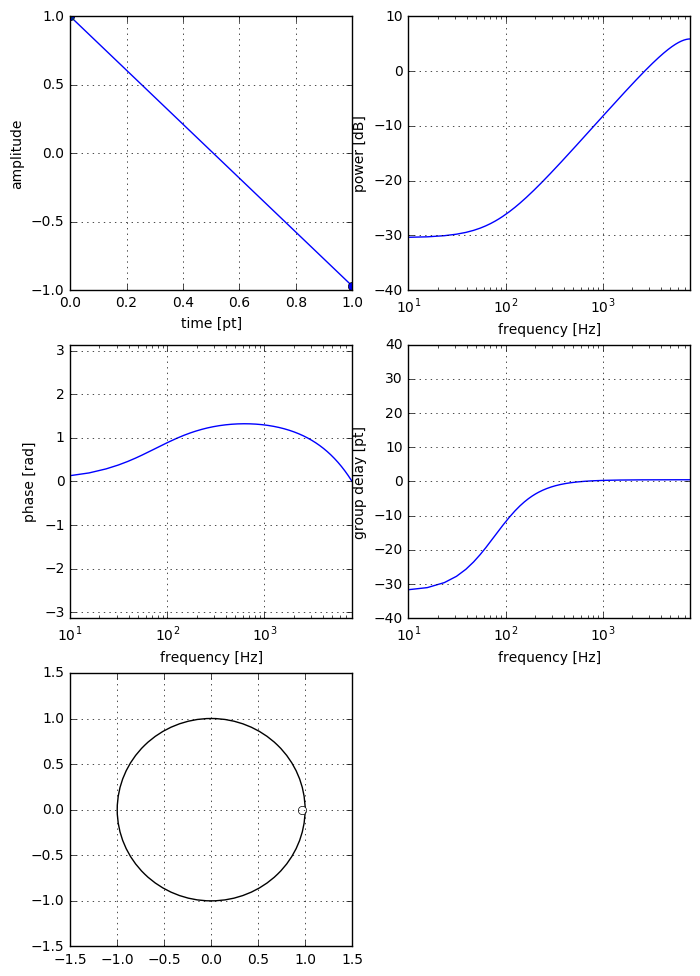

In [18]:
%%freqz_plot 1024 16000.0
1.0, -0.97
1.0

In [21]:
import numpy as np

# all pass filterを設計
FS = 16000.0 # サンプリング周波数
omega = 2.0 * np.pi * 1000.0 / FS # 正規化周波数
r = 0.9 # 極半径

B = [ r**2, -2.0 * r * np.cos(omega), 1.0 ]
A = [ 1.0,  -2.0 * r * np.cos(omega), r**2]
B, A

([0.81, -1.6629831585203161, 1.0], [1.0, -1.6629831585203161, 0.81])

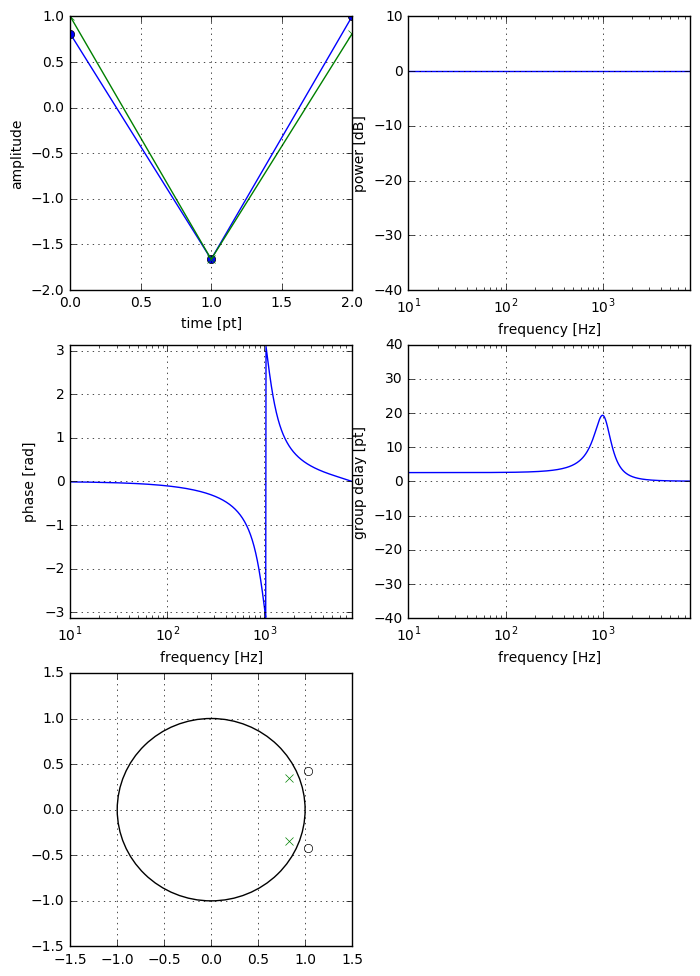

In [22]:
%%freqz_plot 1024 16000.0
0.81, -1.6629831585203161, 1.0
1.0 , -1.6629831585203161, 0.81

In [2]:
import scipy as sp
import scipy.signal as sg

# 線形位相フィルタを設計
sg.firwin(11, 0.2, window="han")

array([ 0.        ,  0.00547868,  0.04276364,  0.12151889,  0.20757905,
        0.24531949,  0.20757905,  0.12151889,  0.04276364,  0.00547868,  0.        ])

/Users/wrist/.pyenv/versions/miniconda3-latest/envs/scientific/lib/python3.5/site-packages/scipy/signal/filter_design.py:1057: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


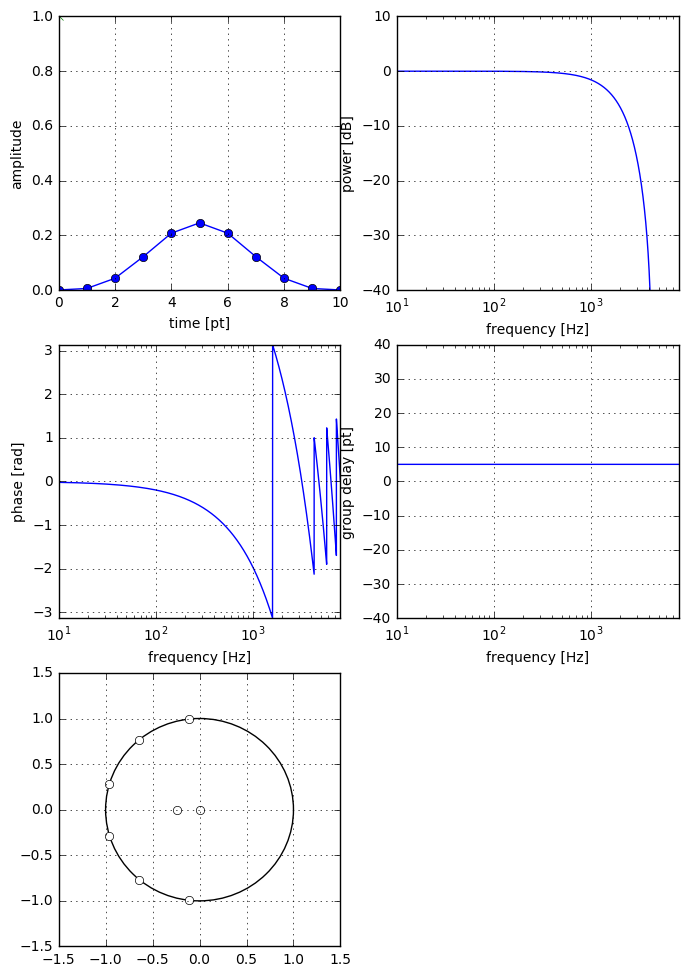

In [25]:
%%freqz_plot 2048 16000.0
0.        ,  0.00547868,  0.04276364,  0.12151889,  0.20757905,        0.24531949,  0.20757905,  0.12151889,  0.04276364,  0.00547868,  0.0 
1.0

## Widget ##

## Jupyter NotebookにおけるWidget ##

* 対話型のWidgetを作成可能
    * スライダーやテキストボックスなどのUIをNotebook上に作成

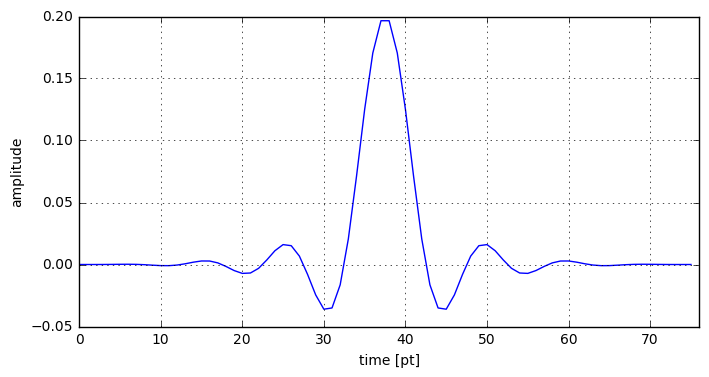

In [3]:
import matplotlib.pyplot as plt
from ipywidgets import interact

max_ntap = 2 ** 12
wins = ["boxcar", "triang", "blackman", "hamming", "hann", 
        "bartlett", "flattop", "parzen", "bohman", "blackmanharris",
        "nuttall", "barthann", "kaiser", "gaussian", "general_gaussian",
        "slepian", "chebwin", "exponential", "tukey" ]

# 文字列はテキストボックス、タプルはスライダー、文字列タプルはセレクトボックス、真偽値はチェックボックスになる
@interact(ntap=[1, max_ntap], window=wins, param1="", param2="")
def firwin_plot(ntap, window, param1, param2):
    b = sg.firwin(ntap, 0.2, window=window)
    plt.figure(figsize=(8,4));
    plt.plot(b)
    plt.grid()
    plt.xlim([0, ntap])
    plt.xlabel(param1)
    plt.ylabel(param2)
    plt.show();

* 公式に載っている例
    * https://jupyter.org/widgets.html

# extension #

## 非公式extension集

* [ipython-contrib/jupyter_contrib_nbextensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions)
    * 色々と便利なextensionが一括で入る
* [Jupyter-contrib/jupyter_nbextensions_configurator](https://github.com/Jupyter-contrib/jupyter_nbextensions_configurator)
    * Notebook Homeから機能オンオフが可能

## 周辺ツール ##

## jupyterhub ##

* https://github.com/jupyterhub/jupyterhub
* マルチユーザで使えるJupyter Notebookを構築可能
* 学校の講義や共同研究などで使うと便利
* nodejsに依存
* 使ったことはないですが紹介

## nbconvert ##

* ipynbファイルをさまざまな形式への変換が可能
    * 'html', 'latex', 'markdown', 'notebook', 'pdf', 'python', 'rst', 'script', 'slides', ...
* ipynbファイルをslideへ変換

```sh
jupyter nbconvert --to slides AboutJupyterForPyData.ipynb
```

## nbpresent ##

* [Anaconda-Platform/nbpresent](https://github.com/Anaconda-Platform/nbpresent)
    * `conda install -c conda-forge nbpresent`
* nbconvertでのreveal.jsを用いたslideへの変換に近い変換を動的に実行
    * jupyter notebookから直接実行可能
    * GUIで直感的に編集可能
* [damianavila/RISE](https://github.com/damianavila/RISE)プロジェクトに影響

## jupyterlab ##

## jupyterlab #

* [jupyterlab](https://github.com/jupyterlab/jupyterlab)
    * ブラウザ上にエディタ、コンソール、ノートブック、ターミナルを同居可能な新しい計算環境(現状α)
* インストール
    `conda install -c conda-forge jupyterlab`
* 実行
    `jupyter lab`

## 以上 ##

* ご静聴ありがとうございました。